# Github Repos Analysis



<img src="https://camo.githubusercontent.com/5806488e6563b58f90ece7330731dc4bac7b8060/68747470733a2f2f7265732e636c6f7564696e6172792e636f6d2f646576706f73742f696d6167652f66657463682f732d2d51484743706e574b2d2d2f68747470733a2f2f6769746875622e636f6d2f6e70656e7472656c2f6f63746f636c697070792f626c6f622f6d61737465722f676966732f656172732e67696625334672617725334474727565" width="200">

<b>GitHub</b> is a web-based version-control and collaboration platform for software developers. ... GitHub facilitates social coding by providing a web interface to the Git code repository and management tools for collaboration. GitHub can be thought of as a serious social networking site for software developers.

I have selcted some topics like Data-Science, Machine-Learning, Computer-Vision, etc. Then I have fetched most stared 100 repository details including repository commits,issue,fork, etc.

The learnings about these tools have been received through the course <b>Data Analysis with Python: Zero to Pandas</b> conducted by <b>Jovian.ml</b>. The course was offered at no cost and made my journey of learning really easy and interesting. The course was done in partnership with <b>freeCodeCamp</b>.



## Downloading the Dataset

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/vatsalparsaniya/github-repositories-analysis'

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahilsao
Your Kaggle Key: ··········


100%|██████████| 157k/157k [00:00<00:00, 25.2MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './github-repositories-analysis'

In [6]:
import os
os.listdir(data_dir)

['Github_data.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "github-analysis-project"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sahilfaizal/github-analysis-project


'https://jovian.ml/sahilfaizal/github-analysis-project'

## Data Preparation and Cleaning

Once the data is downloaded, now lets prepare the data for analysis. It includes mainly exploring the column datatypes, missing values, wrong values etc



In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Loding Dataset

In [12]:
github_data = pd.read_csv('./github-repositories-analysis/Github_data.csv')

### Reading Dataset 

In [13]:
github_data.head()

,Unnamed: 0,Unnamed: 0.1,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


### Handle missing, incorrect and invalid data

In Dataset, Column 'Unnamed: 0' is Index and Column 'Unnamed: 0.1' is stand for sub_index (Topic wise indexing)

In [14]:
github_data = github_data.rename(columns={'Unnamed: 0': 'index', 'Unnamed: 0.1': 'sub_index'})
github_data.drop('index', axis=1, inplace=True)
github_data.reset_index(drop=True, inplace=True)

In [15]:
github_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sub_index         1500 non-null   int64  
 1   topic             1500 non-null   object 
 2   name              1500 non-null   object 
 3   user              1500 non-null   object 
 4   star              1500 non-null   object 
 5   fork              1500 non-null   object 
 6   watch             1500 non-null   object 
 7   issue             1500 non-null   object 
 8   pull_requests     1500 non-null   object 
 9   projects          1313 non-null   float64
 10  topic_tag         1500 non-null   object 
 11  discription_text  1480 non-null   object 
 12  discription_url   669 non-null    object 
 13  commits           1500 non-null   object 
 14  branches          1500 non-null   object 
 15  packages          1500 non-null   int64  
 16  releases          1500 non-null   int64  


### Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

I have found that at row 700 issue column have value "5000+" unwanted + there so can't chage it to numerical befor removing it

In [16]:
github_data.at[700, 'issue'] = str(5000)

In [17]:
github_data

,sub_index,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,0.0,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,95,sensor,react-native-sensor-manager,kprimice,199,53,7,19,5,0.0,[],Native sensors access for react-native,NaN,45,1,0,0,0,Fetching contributors,https://github.com/kprimice/react-native-senso...
1496,96,sensor,weatherstation,androidthings,199,72,31,4,0,0.0,"['android-things', 'google-cloud-pubsub']",Sensor-based peripheral sample using Android T...,NaN,64,2,0,0,0,Apache-2.0,https://github.com/androidthings/weatherstation
1497,97,sensor,OctoPrint-Enclosure,vitormhenrique,198,77,32,63,2,0.0,"['temperature-sensor', 'enclosure', 'raspberry...",OctoPrint Enclosure Plugin,NaN,415,3,0,0,38,GPL-3.0,https://github.com/vitormhenrique/OctoPrint-En...
1498,98,sensor,SensorDashboard,pocmo,197,110,25,0,0,0.0,[],A sensor dashboard for Android plotting all se...,NaN,103,2,0,0,0,Apache-2.0,https://github.com/pocmo/SensorDashboard


### converting number with comma numerical **1,234 **to **1234**

In [18]:
numerical_columns = ["star","fork","watch","issue","pull_requests","projects","commits","branches","packages","releases","contributers"]
# github_data[numerical_columns] = github_data[numerical_columns].apply(lambda x: x.replace(',','').astype(float) if ',' in str(x) else x)
github_data[numerical_columns] = github_data[numerical_columns].fillna(0)
github_data["issue"] = github_data["issue"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
github_data["pull_requests"] = github_data["pull_requests"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
github_data["commits"] = github_data["commits"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
github_data["branches"] = github_data["branches"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)
github_data["contributers"] = github_data["contributers"].apply(lambda x: x.replace(',', '') if ',' in x else x).astype(float)

In [19]:
github_data.head()

,sub_index,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,2940.0,87.0,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,5342.0,6.0,0,0,49.0,View license,https://github.com/keras-team/keras
1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,1505.0,764.0,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,25405.0,21.0,0,0,108.0,View license,https://github.com/scikit-learn/scikit-learn
2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65.0,67.0,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234.0,5.0,0,0,0.0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127.0,38.0,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,1079.0,3.0,0,0,0.0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7.0,0.0,0.0,[],Cheat Sheets,NaN,363.0,3.0,0,0,0.0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


### Column Star, Fork, Watch conatains number (1.2K) format, we need to convert into (1200) format

In [20]:
github_data['star'] = github_data['star'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
github_data['fork'] = github_data['fork'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)
github_data['watch'] = github_data['watch'].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else x)

In [21]:
github_data.head()

,sub_index,topic,name,user,star,fork,watch,issue,pull_requests,projects,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,Data-Science,keras,keras-team,47900,18100,2100,2940.0,87.0,1.0,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,5342.0,6.0,0,0,49.0,View license,https://github.com/keras-team/keras
1,1,Data-Science,scikit-learn,scikit-learn,40300,19600,2200,1505.0,764.0,17.0,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,25405.0,21.0,0,0,108.0,View license,https://github.com/scikit-learn/scikit-learn
2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23100,9900,1500,65.0,67.0,0.0,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234.0,5.0,0,0,0.0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21000,6600,1400,127.0,38.0,0.0,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,1079.0,3.0,0,0,0.0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18400,8200,1500,7.0,0.0,0.0,[],Cheat Sheets,NaN,363.0,3.0,0,0,0.0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


### Processing on column topic_tag

In [22]:
import ast
unique_tags = []
github_data['topic_tag'].apply(lambda x: unique_tags.append(ast.literal_eval(x)))
# unique_tags = list(set([item for sublist in unique_tags for item in sublist]))
all_tag = np.array([item for sublist in unique_tags for item in sublist])
unique, counts = np.unique(all_tag, return_counts=True)
print("Total number of tags in 1500 repository : ",len(all_tag))
print("Total number of unique tags in 1500 repository : ",len(unique))
tag_dataframe = pd.DataFrame({"unique":unique,"counts":counts})
tag_dataframe = tag_dataframe.sort_values(['counts'],ascending=[False])

Total number of tags in 1500 repository :  8729
Total number of unique tags in 1500 repository :  3288


In [23]:
import jovian

In [24]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sahilfaizal/github-analysis-project


'https://jovian.ml/sahilfaizal/github-analysis-project'

## Exploratory Analysis and Visualization

Exploring the data by analyzing its statistics, summarizing its characteristics and visualizing the values of its features to find correlation between them.

Here i am using libraries like Seaborn, plotly, matplotlib

Let's begin by installing <b>plotly</b> also and importing `plotly` `matplotlib.pyplot` and `seaborn`.

In [25]:
!pip install plotly

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Top Repository tags used by users

In [27]:
fig = px.bar(tag_dataframe[:20],x="unique",y="counts",color='counts')
fig.show()

- we can see above machine-learning and deeplearning tags are used more than 200 times

### Repository star distribution topic wise

In [28]:
github_data['star'] = github_data['star'].astype(float)
star_topicwise = github_data.groupby('topic').sum()['star']
fig = px.bar(star_topicwise,x=star_topicwise.index,y="star",color=star_topicwise.index)
fig.show()

- we can see here javascript topic has most stared repository (total 4M+)
- also we know that machie-learning is most usable tags rather then machine-learning repository are not stared as much as java-script
- Android-studio, opencv, sensor,variational-encoder are thos topic which accumulated sum are very low
- Data-science,computer-vision is most hot topic these days but data-science repositerys are not as much stared compared to oter topics

### Repository Fork distribution

In [29]:
github_data['fork'] = github_data['fork'].astype(float)
fork_topicwise = github_data.groupby('topic').sum()['fork']
fig = px.bar(fork_topicwise,x=fork_topicwise.index,y="fork",color=fork_topicwise.index)
fig.show()

- we can see here similarity between repository star and forks
- java-script's repository are most stared and forked also

### Repository watch distribution

In [30]:
github_data['watch'] = github_data['watch'].astype(float)
watch_topicwise = github_data.groupby('topic').sum()['watch']
fig = px.bar(watch_topicwise,x=watch_topicwise.index,y="watch",color=watch_topicwise.index)
fig.show()

- we can see same similarity in topic-wise here like star and fork.

### Coorelation between stars and forks

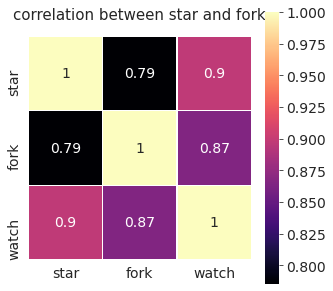

In [31]:
colormap = plt.cm.magma
plt.figure(figsize=(5,5))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(github_data[['star','fork','watch']].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

- star and watch are more correlatd (0.9)
- star and fork is less correlated compare to other two

<b>(Star & watch) > (Fork & watch) > (star > fork)</b>



### All numeric columns correlation

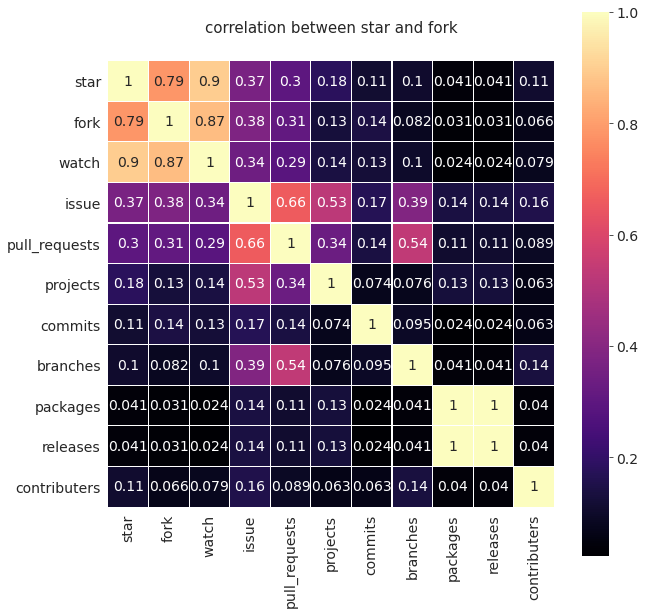

In [32]:
plt.figure(figsize=(10,10))
plt.title('correlation between star and fork', y=1.05, size=15)
sns.heatmap(github_data[numerical_columns].corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

- there are many columns are not correlated

## Asking and Answering Questions

### Q.1 Commit Distribution topic wise

In [33]:
commit_topicwise = github_data.groupby('topic').sum()['commits']
fig = px.pie(commit_topicwise, values='commits', names=commit_topicwise.index, title='Commit Distribution topic wise')
fig.show()

- Definitely Raspberry-pi topic have less star and forks but it wins in commit

### Q.2 Issue Distribution

In [34]:
issue_topicwise = github_data.groupby('topic').sum()['issue']
fig = px.bar(issue_topicwise,x=issue_topicwise.index,y="issue",color=issue_topicwise.index)
fig.show()

- same as like stars and forks

### Q.3 Top Contributors

In [35]:
contributers_topicwise = github_data.groupby('topic').sum()['contributers']
fig = go.Figure(data=[go.Pie(labels=contributers_topicwise.index, values=contributers_topicwise.values, hole=.3)])
fig.show()

- Java-Script again win the game
- Data-Science and c++ topics are came forward. they are not at 2nd and 3rd place in star and fork repository


### Q.5 License Distribution

In [36]:
license_distribution = github_data["License"].apply(lambda x: x if'\n' not in x else None).value_counts()
fig = px.bar(y=license_distribution.values, x=license_distribution.index)
fig.show()

- MIT License has the most license distribution.

### Q.6 Top 10 repository analysis topic wise

### 1) Star

In [37]:
github_group = github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["star"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

- java-script repository have more stars then other repository

### 2) Fork

In [38]:
github_group = github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["fork"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

- machine-learning repositories are more forked then java-scriped repositories rather then java-script repositories are more stared

### getting different scenario in most starred repos having less contributors

In [39]:
github_group = github_data.groupby('topic')
num_of_top_repository = 10
fig = go.Figure()
for name, group in github_group:
    
    fig.add_trace(go.Bar(
    x=list(range(1,num_of_top_repository+1)),
    y=group["contributers"].values[:num_of_top_repository+1],
    name=name,
    ))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()


- here we can see some different senerio
- more stared repositories have less contributers

Let us save and upload our work to Jovian before continuing

In [40]:
import jovian

In [41]:
jovian.commit(project='my-project')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sahilfaizal/my-project


'https://jovian.ml/sahilfaizal/my-project'

## Inferences and Conclusion

We have drawn some interesting inferences and now know more about Github repositories than we started. Here's a summary of what all we came to know through our analysis:

- machine-learning and deeplearning tags are used more than 200 times
- we can see here javascript topic has most stared repository (total 4M+)
- also we know that machie-learning is most usable tags rather then machine-learning repository are not stared as much as java-script
- Android-studio, opencv, sensor,variational-encoder are thos topic which accumulated sum are very low
- Data-science,computer-vision is most hot topic these days but data-science repositerys are not as much stared compared to oter topics
- java-script's repository are most stared and forked also
- Raspberry-pi topic have less star and forks but it wins in commit
- JavaScript, C++, Data-Science has the most contributors
- MIT License has the most license distribution.
- java-script repository have more stars then other repository
- machine-learning repositories are more forked then java-scriped repositories rather then java-script repositories are more stared
- more stared repositories have less contributers


In [42]:
import jovian

In [43]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sahilfaizal/github-analysis-project


'https://jovian.ml/sahilfaizal/github-analysis-project'

### Medium Blog

[Click Here to see it.](https://medium.com/@sahilfaizal/data-analysis-with-python-a-jovian-ml-and-freecodecamp-org-collaboration-e99fdcdc7c9a)

## References and Future Work

Dataset used - https://www.kaggle.com/vatsalparsaniya/github-repositories-analysis

In [44]:
import jovian

In [45]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sahilfaizal/github-analysis-project


'https://jovian.ml/sahilfaizal/github-analysis-project'